In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga el conjunto de datos con el tipo de datos especificado
multiple_choice_responses = pd.read_csv("Dataset/kaggle-survey-2019/multiple_choice_responses.csv", low_memory=False)
other_text_responses = pd.read_csv("Dataset/kaggle-survey-2019/other_text_responses.csv")
questions_only = pd.read_csv("Dataset/kaggle-survey-2019/questions_only.csv")
survey_schema = pd.read_csv("Dataset/kaggle-survey-2019/survey_schema.csv")

# Muestra las columnas de todas las tablas
# print("1. multiple_choice_response: ", multiple_choice_responses.columns)
# print("2. other_text_responses: ", other_text_responses.columns)
# print("3. questions_only: ", questions_only.columns)
# print("4. survey_schema: ", survey_schema)

multiple_choice_responses['Q3'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom',
                                       inplace = True)

In [3]:
# Gender Distribution
# Seleccionar la columna Q2 y asignar un nombre de columna adecuado
genders = multiple_choice_responses[['Q2']].drop(multiple_choice_responses.index[0])
genders.columns = ['Gender']

# Filtrar solo Female y Male, y luego agrupar y contar la cantidad de cada uno
gender_distr = genders[(genders['Gender'] == 'Female') | (genders['Gender'] == 'Male')].groupby('Gender').size().reset_index(name='Respondents')


In [4]:
# Gender Distribution
# Calcular el total de encuestados
total_respondents = gender_distr['Respondents'].sum()

# Calcular el porcentaje de encuestados de cada género
gender_distr['Percentage'] = (gender_distr['Respondents'] / total_respondents) * 100

# Imprimir los resultados
print("Gender Distribution")
print(gender_distr)


Gender Distribution
   Gender  Respondents  Percentage
0  Female         3212   16.599483
1    Male        16138   83.400517


In [ ]:
# Gender Distribution
# Crear el gráfico de barras
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Gender Distribution')
ax.set(xlabel='Gender', ylabel='Respondents')
sns.set(style='whitegrid')
ax = sns.barplot(x='Gender', y='Respondents', data=gender_distr, ax=ax)
plt.show()

In [5]:
# Gender Distribution by Country
demographics = multiple_choice_responses[['Q1','Q2','Q3']].drop(multiple_choice_responses.index[0])
demographics = demographics[(demographics['Q2'] == 'Female') | (demographics['Q2'] == 'Male')]
demographics = demographics.rename(columns={'Q1':'Age_Group', 'Q2':'Gender', 'Q3':'Country'})

loc = pd.crosstab(demographics['Country'], demographics['Gender'])

# Convirtiendo las columnas 'Female' y 'Male' a tipo float
loc['Female'] = loc['Female'].astype(float)
loc['Male'] = loc['Male'].astype(float)

# Ordenando los valores por el número de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

In [6]:
# Gender Distribution by Country
# Calcular el total de encuestados por país
loc['Total'] = loc['Female'] + loc['Male']

# Calcular el porcentaje de encuestados de cada género en cada país
loc['Female_Percentage'] = (loc['Female'] / loc['Total']) * 100
loc['Male_Percentage'] = (loc['Male'] / loc['Total']) * 100

# Imprimir los resultados
print("Gender Distribution by Country")
print(loc[['Female_Percentage', 'Male_Percentage']])


Gender Distribution by Country
Gender                        Female_Percentage  Male_Percentage
Country                                                         
India                                 16.303658        83.696342
United States of America              20.724012        79.275988
Other                                 15.884116        84.115884
Canada                                22.863741        77.136259
Germany                               17.399618        82.600382
United Kingdom                        19.361702        80.638298
China                                 15.189873        84.810127
Brazil                                10.941828        89.058172
Russia                                12.419355        87.580645
Turkey                                23.239437        76.760563
Nigeria                               16.030534        83.969466
Japan                                  8.108108        91.891892
France                                14.058355        85.9

In [ ]:
# Gender Distribution by Country - Female Respondents by Location
# Creando el gráfico de barras horizontal
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location')
ax.set(xlabel='Counts')
sns.set(style='whitegrid')
ax = sns.barplot(x=loc['Female'], y=loc.index, ax=ax, palette="vlag")
plt.show()

In [7]:
# Female Respondents by Location (Percentage)
# Calculando el porcentaje de mujeres por ubicación
for i in loc.index:
    female = loc.at[i, 'Female']
    male = loc.at[i, 'Male']
    total = female + male
    loc.at[i, 'Female'] = round((female / total) * 100, 2)  # Calculando el porcentaje y redondeando a 2 decimales

# Eliminando la columna 'Male'
loc = loc.drop(['Male'], axis=1)

# Ordenando los valores por el porcentaje de mujeres (en orden descendente)
loc = loc.sort_values(by=['Female'], ascending=False)

# Imprimir los resultados
print("Female Respondents by Location (Percentage)")
print(loc[['Female']])


Female Respondents by Location (Percentage)
Gender                        Female
Country                             
Tunisia                        48.53
Philippines                    31.67
Iran, Islamic Republic of...   29.47
Malaysia                       29.33
Kenya                          25.44
Ireland                        25.29
Turkey                         23.24
Indonesia                      23.03
Canada                         22.86
Thailand                       22.73
Egypt                          22.31
Morocco                        21.95
United States of America       20.72
Romania                        20.69
Algeria                        20.69
Saudi Arabia                   20.00
South Korea                    20.00
New Zealand                    19.61
United Kingdom                 19.36
Hong Kong (S.A.R.)             18.75
Belarus                        17.91
Ukraine                        17.89
Portugal                       17.86
Pakistan                       

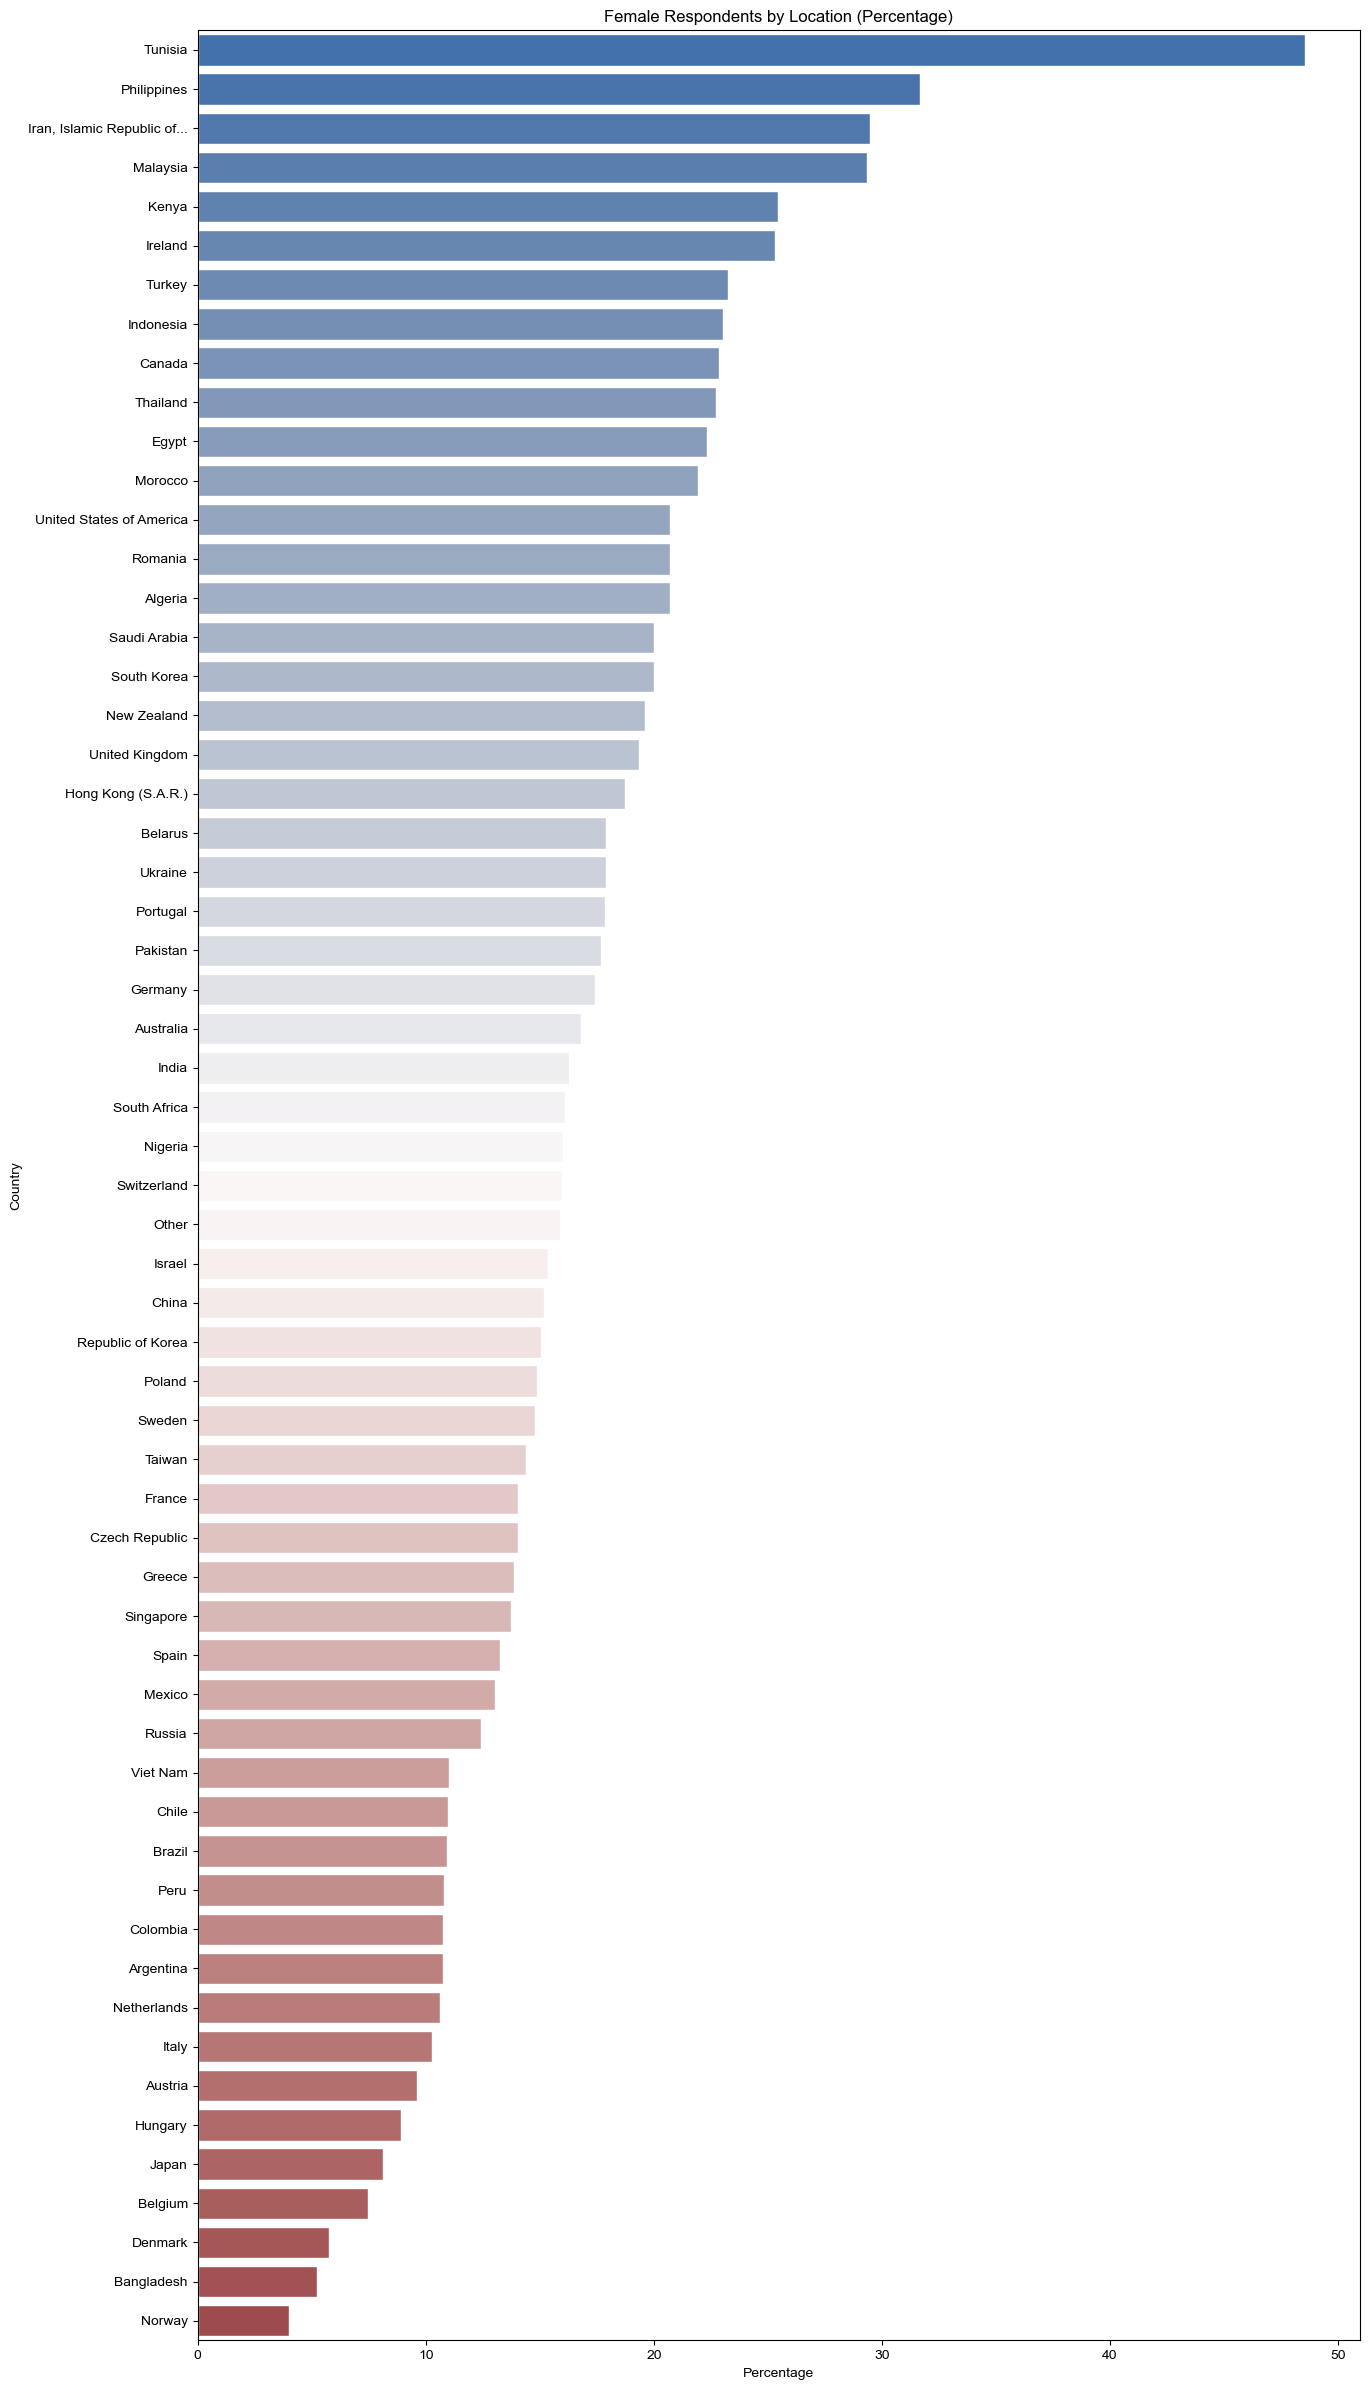

In [8]:
# Female Respondents by Location (Percentage)
# Crear el gráfico de barras horizontal para el porcentaje de mujeres
fig, ax = plt.subplots(1, 1, figsize=(15, 30))
ax.set_title('Female Respondents by Location (Percentage)')
ax.set(xlabel='Percentage')
sns.set(style='whitegrid')
ax = sns.barplot(x=list(loc['Female']), y=loc.index, ax=ax, palette="vlag")
plt.show()

In [34]:
# Gender Distribution by Age Group
# Crear el gráfico de barras horizontal para el porcentaje de mujeres
age = pd.crosstab(demographics['Age_Group'], demographics['Gender'])
age['Female'] = age['Female'].astype(float)
age['Male'] = age['Male'].astype(float)

totals = demographics.groupby('Age_Group').agg({'Gender':'count'})

In [35]:
# Gender Distribution by Age Group
# Mostrar los resultados en un DataFrame
results_df = pd.DataFrame({
    'Age_Group': totals.index,
    'Total_Gender': totals['Gender'],
    'Female_Respondents': age['Female'],
    'Male_Respondents': age['Male']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Age_Group,Total_Gender,Female_Respondents,Male_Respondents
Age_Group,,,,
18-21,18-21,2468,419.0,2049.0
22-24,22-24,3558,678.0,2880.0
25-29,25-29,4372,810.0,3562.0
30-34,30-34,3065,513.0,2552.0
35-39,35-39,2047,304.0,1743.0
40-44,40-44,1410,209.0,1201.0
45-49,45-49,928,118.0,810.0
50-54,50-54,678,80.0,598.0
55-59,55-59,408,51.0,357.0


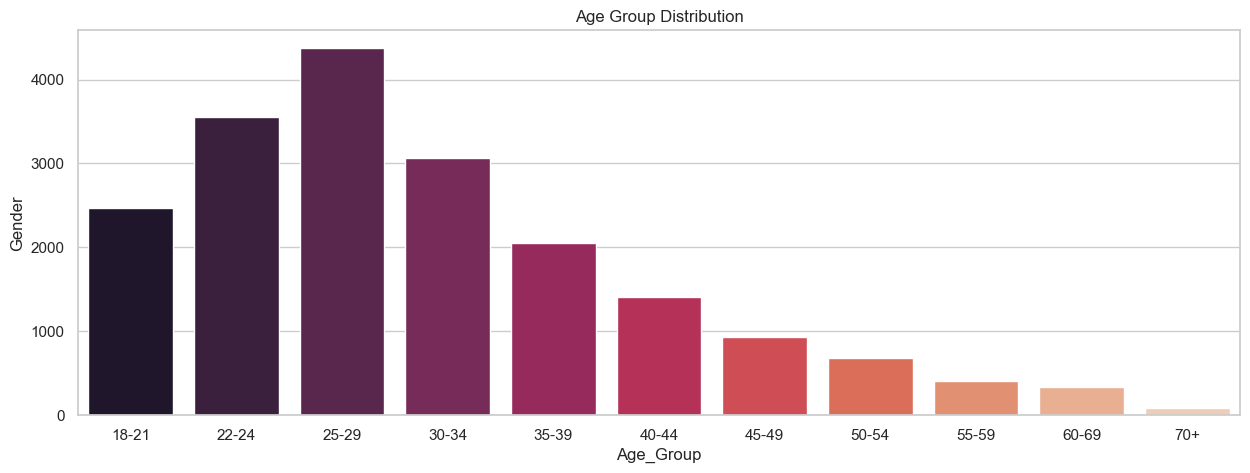

In [31]:
# Gender Distribution by Age Group - Age Group Distribution
# Crear el gráfico de barras horizontal
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Age Group Distribution')
ax.set(xlabel='Age Group', ylabel='Respondents')
sns.set(style='whitegrid')
sns.barplot(x=totals.index, y=totals['Gender'], palette="rocket", ax=ax)
plt.show()

In [36]:
# Gender Distribution by Age Group - Female Respondents by Age Group (Percentage)
# Calcular los porcentajes de mujeres por grupo de edad
for i in age.index:
    female = age.at[i, 'Female']
    male = age.at[i, 'Male']
    total = female + male
    age.at[i, 'Female'] = round((female / total) * 100, 2)  # Convertir a porcentaje y redondear a 2 decimales

# Eliminar la columna 'Male' si deseas incluir solo el porcentaje de mujeres
age = age.drop(['Male'], axis=1)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Age_Group': age.index,
    'Female_Percentage': age['Female']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:
          Age_Group  Female_Percentage
Age_Group                             
18-21         18-21              16.98
22-24         22-24              19.06
25-29         25-29              18.53
30-34         30-34              16.74
35-39         35-39              14.85
40-44         40-44              14.82
45-49         45-49              12.72
50-54         50-54              11.80
55-59         55-59              12.50
60-69         60-69               7.83
70+             70+               4.76


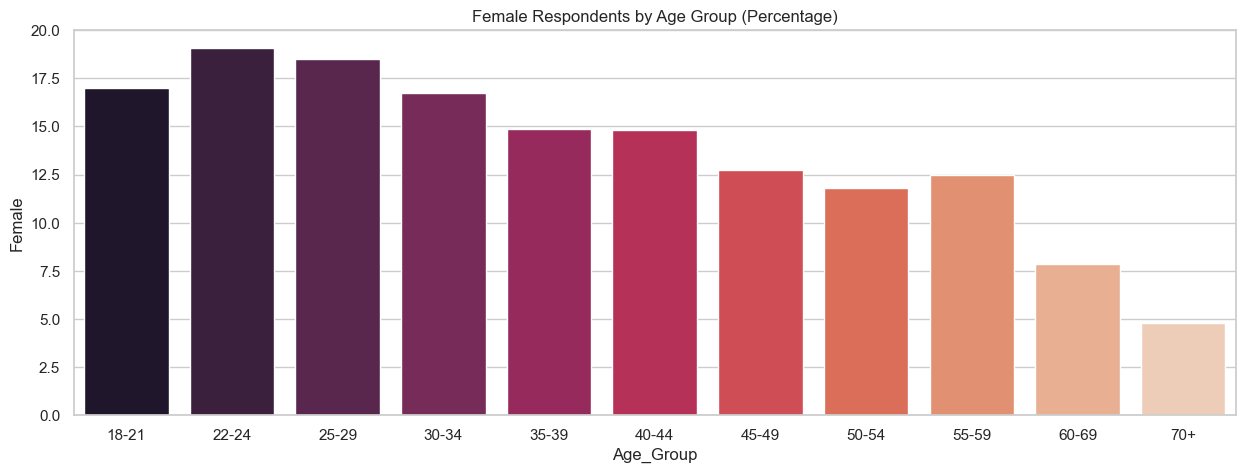

In [37]:
# Gender Distribution by Age Group - Female Respondents by Age Group (Percentage)
# Crear el gráfico de barras horizontal para el porcentaje de mujeres

fig, ax = plt.subplots(1,1,figsize=(15,5))

ax.set_title('Female Respondents by Age Group (Percentage)')
ax.set(ylabel='Percentage')
sns.set(style='whitegrid')

ax = sns.barplot(x=age.index, y=age['Female'], palette="rocket")

plt.show()

In [39]:
# Career and Education
# Filtrar los datos solo para mujeres y hombres
women = multiple_choice_responses[multiple_choice_responses['Q2']=='Female'].copy()
men = multiple_choice_responses[multiple_choice_responses['Q2']=='Male'].copy()

# Agrupar por título de trabajo y contar el número de ocurrencias
jobs = women.groupby('Q5', as_index=False).agg({'Q1':'count'})
jobs = jobs.rename(columns={'Q1':'Count', 'Q5':'Job_Title'})
jobs = jobs.sort_values(by=['Count'], ascending = False)

# Crear un DataFrame con los resultados
results_df = pd.DataFrame({
    'Job_Title': jobs['Job_Title'],
    'Count': jobs['Count']
})

# Mostrar el DataFrame
print("Resultados del gráfico en un DataFrame:")
results_df

Resultados del gráfico en un DataFrame:


,Job_Title,Count
11,Student,764
4,Data Scientist,606
2,Data Analyst,347
9,Software Engineer,313
6,Other,258
8,Research Scientist,241
5,Not employed,214
0,Business Analyst,132
7,Product/Project Manager,83
3,Data Engineer,76


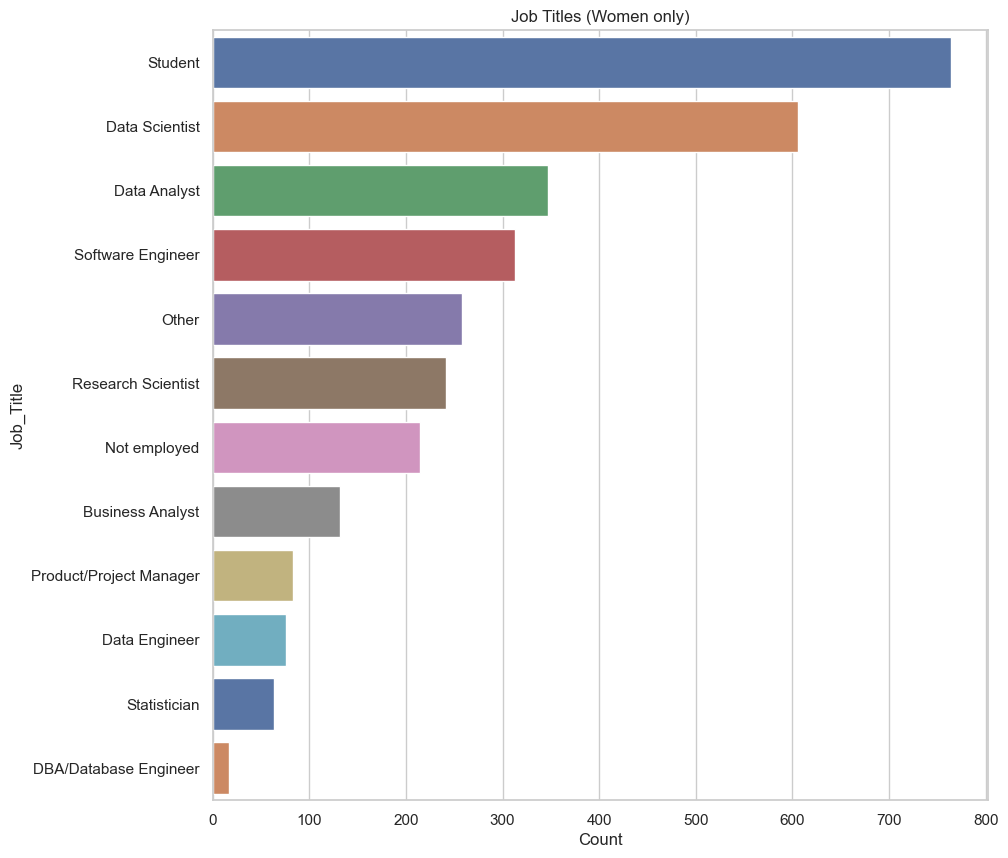

In [40]:
# Career and Education
# Crear el gráfico 

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_title('Job Titles (Women only)')
sns.set(style='whitegrid')
ax = sns.barplot(x='Count', y='Job_Title', palette="deep", data=jobs)

plt.show()

In [ ]:
stem = ['Data Scientist', 'Data Analyst', 'Software Engineer', 'Research Scientist', 
        'Data Engineer', 'DBA/Database Engineer', 'Statistician']
unclear = ['Business Analyst', 'Product/Project Manager']

jobs['Job_Field'] = [ 'STEM' if x in stem else 'Unclear' if x in unclear else x for x in jobs['Job_Title'] ]
field = jobs.groupby('Job_Field', as_index=False).agg({'Count':'sum'})
field = field.sort_values(by=['Count'], ascending=False)
field['Count'] = field['Count'].astype(float)


total = field['Count'].sum()

for i in field.index:
    count = field.at[i, 'Count']
    field.at[i, 'Count'] = round(count / total,4)

field = field.rename(columns={'Count':'Percentage'})

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('Job Fields (Women only)')
sns.set(style='whitegrid')

sns.barplot(x='Percentage', y='Job_Field', data=field)

plt.show()

In [ ]:
education = women.groupby('Q4', as_index = False).agg({'Q1':'count'})
education = education.rename(columns={'Q1':'Count','Q4':'Education'}).sort_values(by=['Count'], ascending = False)
education.replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
education.replace("No formal education past high school", "High School", inplace = True)
education.replace("I prefer not to answer", "No answer", inplace = True)


postgrad = ["Master’s degree", "Doctoral degree", "Professional degree"]
no_edu = ["Some college", "High School"]
education['Category'] = [ 'Postgrad' if x in postgrad else 'No Degree' if x in no_edu 
                         else 'Undergrad' if x == "Bachelor’s degree" else x for x in education['Education'] ]

edu_cat = education.groupby('Category', as_index = False).agg({'Count':'sum'})
edu_cat['Count'] = edu_cat['Count'].astype(float)
total = edu_cat['Count'].sum()

for i in edu_cat.index:
    count = edu_cat.at[i, 'Count']
    edu_cat.at[i, 'Count'] = round(count / total,4)
    
edu_cat = edu_cat.rename(columns={'Count':'Percentage'}).sort_values(by=['Percentage'], ascending = False)


fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('Degrees')
sns.set(style='whitegrid')

# ax = sns.barplot('Count', 'Education', ax=ax, palette="deep", data=education)
sns.barplot(x='Count', y='Education', palette="deep", data=education)

plt.show()


In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Degree Categories')
sns.set(style='whitegrid')

# ax = sns.barplot('Percentage', 'Category', ax=ax, palette="deep", data=edu_cat)
sns.barplot(x='Percentage', y='Category', palette="deep", data=edu_cat, ax=ax)

plt.show()

In [ ]:
low_salary = women[women['Q10']=='$0-999']
lows = low_salary.groupby('Q5', as_index = False).agg({'Q1':'count'})
lows = lows.rename(columns={'Q1':'Count', 'Q5':'Occupation'})
lows = lows.sort_values(by=['Count'], ascending = False)

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.set_title('Low Salaries: Occupation')
sns.set(style='whitegrid')


sns.barplot(x='Count', y='Occupation', palette="deep", data=lows)
plt.show()

In [ ]:
def find_number(x):    
    if x[0] == '>':
        return 500001
    elif x[0] == '$':
        return 0
    else:
        x = x.strip().replace(',','')
        return int(x[0 : x.find('-')])

salaries = women.groupby('Q10', as_index = False).agg({'Q1':'count'})
salaries = salaries.rename(columns={'Q10':'Range', 'Q1':'Count'})

salaries['Range_Start'] = salaries.Range.apply(lambda x: find_number(x))

salaries = salaries.sort_values(by=['Range_Start'])
salaries = salaries[salaries['Range_Start'] != 0]

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.set_title('Salaries')
sns.set(style='whitegrid')
sns.barplot(x='Range', y='Count', data=salaries)
ax.set_xticklabels(labels=salaries['Range'], rotation=30)
plt.show()


In [ ]:
# print(salaries.head())

In [ ]:
women['Q4'].replace("No formal education past high school", "High School", inplace = True)
women['Q4'].replace("Some college/university study without earning a bachelor’s degree", "Some college", inplace = True)
no_degree = women[(women['Q4']=='High School') | (women['Q4']=='Some college')]

no_degree_sal = no_degree.groupby('Q10', as_index=False).agg({'Q1':'count'})
no_degree_sal = no_degree_sal.rename(columns={'Q10':'Range', 'Q1':'Count'})

no_degree_sal['Range_Start'] = no_degree_sal.Range.apply(lambda x: find_number(x))
no_degree_sal = no_degree_sal.sort_values(by=['Range_Start'])

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,8))
ax.set_title('Salaries - No Degree')
sns.set(style='whitegrid')
sns.barplot(x='Range', y='Count', palette="deep", data=no_degree_sal, ax=ax)
ax.set_xticklabels(labels=no_degree_sal['Range'], rotation=30)
plt.show()

In [ ]:
no_degree_job = no_degree.groupby('Q5', as_index=False).agg({'Q1':'count'})
no_degree_job = no_degree_job.rename(columns={'Q5':'Education', 'Q1':'Count'})
no_degree_job = no_degree_job.sort_values(by=['Count'], ascending=False)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Job Title - No Degree')
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Education', palette="deep", data=no_degree_job)
plt.show()

In [ ]:
women['Q15'].replace('I have never written code', 'None', inplace=True)
women['Q15'].replace(np.nan, 'No answer', inplace = True)

code = women.groupby('Q15', as_index = False).agg({'Q1':'count'})
code = code.rename(columns={'Q1':'Count', 'Q15':'Coding Experience'})
code = code.sort_values(by=['Count'], ascending = False)

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Coding Experience')
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Coding Experience', ax=ax, palette="deep", data=code)
plt.show()

In [ ]:
beginner = ['< 1 years', '1-2 years']
mid = ['3-5 years', '5-10 years']
expert = ['10-20 years', '20+ years']

code['Level'] = [ 'Beginner' if x in beginner else 'Intermediate' if x in mid 
                 else 'Expert' if x in expert else x for x in code['Coding Experience']]

code_lvl = code.groupby('Level').agg({'Count':'sum'})
order = ['None','Beginner','Intermediate','Expert','No answer']
code_lvl = code_lvl.reindex(order).reset_index()

total = code_lvl['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.set_title('Coding Level - Women')
sns.set(style='whitegrid')
sns.barplot(x='Level', y='Count', ax=ax, palette="deep", data=code_lvl, estimator=lambda x: sum(x)/total*100.0)
ax.set(ylabel='Percentage')
plt.show()


In [ ]:
exploring = "We are exploring ML methods (and may one day put a model into production)"
no = "No (we do not use ML methods)"
women['Q8'] = ["Don't know" if x == "I do not know" else "No" if x == no 
              else "Exploring" if x == exploring else "Yes" for x in women['Q8']]
men['Q8'] = ["Don't know" if x == "I do not know" else "No" if x == no 
              else "Exploring" if x == exploring else "Yes" for x in men['Q8']]

ml = women.groupby('Q8', as_index = False).agg({'Q1':'count'})
ml_m = men.groupby('Q8', as_index = False).agg({'Q1':'count'})
ml = ml.rename(columns={'Q8':'Machine_Learning', 'Q1':'Count'})
ml_m = ml_m.rename(columns={'Q8':'Machine_Learning', 'Q1':'Count'})

total = ml['Count'].sum()
total_m = ml_m['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(18,5))
sns.set(style='whitegrid')
sns.barplot(x='Machine_Learning', y='Count', ax=ax[0], palette="deep", data=ml, estimator=lambda x: sum(x)/total*100.0)
sns.barplot(x='Machine_Learning', y='Count', ax=ax[1], palette="deep", data=ml_m, estimator=lambda x: sum(x)/total_m*100.0)
for a in ax:
    a.set(xlabel='Machine Learning', ylabel='Percentage')
ax[0].set_title('ML Usage - Women')
ax[1].set_title('ML Usage - Men')
plt.show()


In [ ]:
responses = women['Q1'].count()
responses_m = men['Q1'].count()
base = 'Q18_Part_'
counts = dict()
counts_m = dict()

palette = dict()
colours = sns.color_palette('deep',11)

for i in range(1, 12):
    col = base + str(i)
    count = women[col].count()
    count_m = men[col].count()
    lang_series = women[col].dropna()
    lang = lang_series.values[0] if len(lang_series) > 0 else None
    if lang:
        counts[lang] = count
        counts_m[lang] = count_m
        palette[lang] = colours[i - 1]
        
result = pd.DataFrame.from_dict(counts, orient='index').reset_index().rename(columns={'index':'Language', 0:'Count'})
result = result.sort_values(by=['Count'], ascending = False)
result_m = pd.DataFrame.from_dict(counts_m, orient='index').reset_index().rename(columns={'index':'Language', 0:'Count'})
result_m = result_m.sort_values(by=['Count'], ascending = False)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
sns.set(style='whitegrid')
sns.barplot(x='Count', y='Language', ax=ax[0], palette=palette, data=result, 
            estimator=lambda x: sum(x) / responses * 100.0)
sns.barplot(x='Count', y='Language', ax=ax[1], palette=palette, data=result_m, 
            estimator=lambda x: sum(x) / responses_m * 100.0)

for a in ax:
    a.set(ylabel='', xlabel='Percentage')
ax[0].set_title('Languages - Women')
ax[1].set_title('Languages - Men')
plt.show()

In [ ]:
python = women[women['Q18_Part_1']=='Python'].copy()

python['Q15'] = [ 'New' if x == '< 1 years' else 'Beginner' if x == '1-2 years' else 'Proficient' for x in python['Q15']]
py_exp = python.groupby('Q15').agg({'Q1':'count'})

py_order = ['New', 'Beginner', 'Proficient']
py_exp = py_exp.reindex(py_order).reset_index()
py_exp = py_exp.rename(columns={'Q15':'Experience', 'Q1':'Count'})

total_py = py_exp['Count'].sum()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Coding Level - Female Python Users')
sns.set(style='whitegrid')
sns.barplot(x='Experience', y='Count', ax=ax, palette="deep", data=py_exp, 
            estimator=lambda x: sum(x) / total_py * 100.0)
ax.set(ylabel='Percentage')
plt.show()

In [ ]:
for i in python.index:
    count = 0
    for j in range(2,11):
        lang = python.at[i, (base + str(j))]
        if pd.isnull(lang) == False:
            count += 1
    python.at[i, 'Q18_Count'] = count
    
python['Multi_Language'] = [ '> 5' if x >= 5.0 else '2-4' if x > 2.0 
                            else 0 if x == 0.0 else 1 if x == 1.0 else 2 for x in python['Q18_Count']]
others = python.groupby(['Multi_Language', 'Q15']).agg({'Q1':'count'}).rename(columns={'Q1':'Count'})
others = pd.DataFrame(data={'Count': others['Count']}, index=others.index).reset_index()

py_only = others[others['Multi_Language']==0].drop(['Multi_Language'],axis=1).rename(columns={'Q15':'Experience'})
total_py_only = py_only['Count'].sum()


In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.set_title('Coding Level - Python only (Female)')
sns.set(style='whitegrid')
sns.barplot(x='Experience', y='Count', ax=ax, palette="deep", data=py_only, 
            estimator=lambda x: sum(x) / total_py_only * 100.0, order=py_order)
ax.set(ylabel='Percentage')
plt.show()


In [ ]:
import warnings

# Desactivar las advertencias relacionadas con el ajuste del diseño de la figura
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

cat_order = ['New', 'Beginner', 'Proficient']

sns.set(style='whitegrid')
g = sns.catplot(x='Multi_Language', y='Count', col='Q15', data=others, kind='bar', col_order=cat_order)
titles = ["New", "Beginner", "Proficient"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set(xlabel='Languages in Addition to Python')

plt.show()


In [ ]:
# 
# print(others.head())  # Imprimir las primeras filas del DataFrame
# print(others['Q15'].unique())  # Verificar las categorías únicas en 'Q15'
# print(others['Multi_Language'].unique())  # Verificar las categorías únicas en 'Multi_Language'
# print(others['Q15'].value_counts())  # Contar las ocurrencias de cada categoría en 'Q15'
# print(others['Multi_Language'].value_counts())  # Contar VECES de cada categoría en 'Multi_Language'
# print(others.sample(5))  # Visualizar una muestra aleatoria de 5 filas
# 